In [1]:
%matplotlib inline

from __future__ import division
import numpy as np
import menpo.io as mio
from menpo.image import Image
from menpo.feature import ndfeature, greyscale, centralize, normalize_norm, normalize_std
from menpo.landmark import labeller, ibug_face_66
from menpo.visualize import visualize_images
from alaborticcv2015.deepconvkernel.discriminative import DiscriminativeLDCN, learn_svm_filters

In [2]:
@ndfeature
def grey_igo(pixels):
    pixels = greyscale(pixels)
    pixels = igo (pixels)
    return pixels

def greyscale_average(pixels):
    return greyscale(pixels, mode='average')

# Generate SVM Networks:

Load data:

In [3]:
folder_path = '/data/PhD/alaborticcv2015/'

In [4]:
images = []
for i in mio.import_images('/data/PhD/DataBases/faces/lfpw/**/*', verbose=True, 
                           max_images=1000):
    i.crop_to_landmarks_proportion_inplace(0.5)
    i = i.rescale_landmarks_to_diagonal_range(100)
    labeller(i, 'PTS', ibug_face_66)
    images.append(i)

- Loading 1000 assets: [====================] 100%

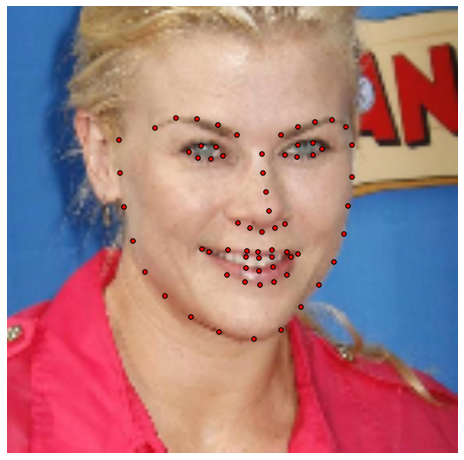

In [5]:
visualize_images(images)

Set networks options:

In [6]:
# network options
features = greyscale_average
architecture = 1
normalize_patches = centralize
normalize_filters = None

# compute feature images
images = [features(i) for i in images] 

# define class labels
class_labels = ['jaw', 
                'left_eyebrow', 
                'right_eyebrow', 
                'nose', 
                'left_eye', 
                'right_eye', 
                'mouth']

patch_shape = [ps for ps in range(2, 11, 1)]

/data/pythondev/src/menpo/menpo/image/base.py:130: UserWarning: The copy flag was NOT honoured. A copy HAS been made. Please ensure the data you pass is C-contiguous.
  warn('The copy flag was NOT honoured. A copy HAS been made. '


## SVM Net:

In [ ]:
for ps in patch_shape:
    net = DiscriminativeLDCN(learn_filters=learn_svm_filters, 
                             n_layers=1,
                             architecture=architecture,
                             normalize_patches=centralize,
                             normalize_filters=None,
                             patch_shape=(ps, ps))

    net.learn_network_from_class_labels(images, 
                                        class_labels, 
                                        group='ibug_face_66')

    file_name = (folder_path
                 + 'networks/svm_net/svm_net_'
                 + features.__name__ + '_'
                 + str(1) + '_' 
                 + str(architecture) + '_'
                 + str(ps) + '.pkl.gz') 
    mio.export_pickle(net, file_name, overwrite=True)

    print '- network {}: '.format(ps)

## SVN Net 2:

In [7]:
for ps in patch_shape:

    net = DiscriminativeLDCN(learn_filters=learn_lda_filters, 
                             n_layers=2,
                             architecture=architecture,
                             normalize_patches=centralize,
                             normalize_filters=None,
                             patch_shape=(ps, ps))

    nf1 = np.minimum(nf1, ps * ps -1)
    nf2 = np.minimum(nf2, ps * ps -1)
    net.learn_network_from_class_labels(images, 
                                        class_labels, 
                                        group='ibug_face_66', 
                                        n_filters=[nf1, nf2])

    file_name = (folder_path
                 + 'networks/svm_net/svm_net_'
                 + features.__name__ + '_'
                 + str(2) + '_' 
                 + str(architecture) + '_'
                 + str((nf1, nf2)) + '_' 
                 + str(ps) + '.pkl.gz') 
    mio.export_pickle(net, file_name, overwrite=True)

    print '- network {}, {}, {}: '.format(nf1, nf2, ps)

NameError: name 'learn_lda_filters' is not defined